In [1]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

# Mac Directories
git_dir = r'/Users/markhenss/Documents/GitHub'
work_dir = r'/Applications/anaconda3'

os.chdir(git_dir)
import whypy
os.chdir(work_dir)

<div style="background-color:RGB(0,81,158);color:RGB(255,255,255);padding:10px;">
<h1> <a name="whypy"></a>WhyPy</h1>
</div>

A python repository for **causal inference**. 

Currently available approaches in this repository are based on **Additive Noise Models (ANMs)**.

<u>Install:</u>
```
pip install whypy
```

<u>Content:</u>
1. [A short introduction into the theory of causal inference](#theory)
2. [A quick start example how to run causal inference with this repository](#quick)
3. [Additive Noise Models in WhyPy](#model)
    1. [Model Instances (Bivariate-MultiVariate | SteadyState-Transient)](#model-init)
    2. [Instance Parameters](#model-parameters)
    3. [Instance Methods](#model-methods)
    4. [Instance Attributes](#model-attributes)
4. [Various Templates for:](#template)
    1. [Observations](#template-observations)
    2. [Regression Models](#template-regressionmodels)
    3. [Scaler](#template-scaler)

<u>Models:</u>

Within the WhyPy Toolbox four possible models are distinguished

1. The data producing process is **steady state** + The model is **bivariate** (one independent variable)

   ![BiVariate-SteadyState](__pictures/cause-effect-bivariate-steadystate.pdf)

2. The data producing process is **steady state** + The model is **bivariate** (n independent variable)

   ![MultiVariate-SteadyState](__pictures/cause-effect-mvariate-steadystate.pdf)

3. The data producing process is **transient** ($t_0$: offset, $s$: stride)+ The model is **multi variate** (one independent variable)

   ![BiVariate-Transient](__pictures/cause-effect-bivariate-transient.pdf)

4. The data producing process is **transient** ($t_0$: offset, $s$: stride)+ The model is **multi variate** (n independent variable)

   ![MultiVariate-Transient](__pictures/cause-effect-mvariate-transient.pdf)



<div style="background-color:RGB(0,81,158);color:RGB(255,255,255);padding:10px;">
<h1> <a name="theory"></a>Causal Inference (Short Introduction)</h1>
</div>

The most elementary question of causality is the one asking whether "$X$ causes $Y$ or vice versa". An often discussed example is the question if smoking ($X$) causes cancer ($Y$). At this point the question about causal relationships is already getting more complex. Beside the possibility that $X$ causes $Y$ ($X \rightarrow Y$), there are other possible causal relationships. One is that a third Variable $Z$ is confounding both $X$ and $Y$ ($X \leftarrow Z \rightarrow Y$). In the confounding case, only looking at $X$ and $Y$, might show a correlation due to the confounder even though they are not causaly related. [[1]](#Pearl), [[2]](#Mooji)

![Cause-Effect-Confounded](__pictures/cause-effect-confounded.pdf)

Causal Inference is the task of learning causal relationships from purely observational data. This task is a fundamental problem in science. A variety of causal inference methods are available that were claimed to be able to solve this task under certain assumptions. These assumptions are for example no confounding, no feedback loops or no selection bias. Be aware, that results given by causal inference are only valid under the methods assumptions. ITo draw causal conclusions, these methods are exploiting the complexety of the underlying models of the observational data in genearal. [[2]](#Mooji), [[3]](#Schoelkopf)

The family of causal inference methods to used here are Additive Noise Models (ANMs). In ANMs the influence of noise is restricted to be Additive ($Y \sim f(X) + \textbf{N}_Y$). Methods in these class are either based on **independence of residuals** or **maximum likelihood**. The procedure in the **WhyPy Toolbox** is the following:

---
1. **Input:**

   Observations: $X$, $Y$
   
   Regression Model: $M$
   
   Scaler (optional): $n_\gamma(\cdot)$

2. **Normalization (optional):**

   Calculate $X^{\star} = n_x(X)$
   
   Calculate $Y^{\star} = n_y(Y)$

3. **Time Shift (if model is transient):**

   a) Shift $X^{\star} = X^{\star}[0:-i:s], Y^{\star} = Y^{\star}[i::s]$
   
   b) Shift $Y^{\star} = Y^{\star}[0:-i:s], X^{\star} = X^{\star}[i::s]$
   
4. **Holdout (if holdout is True):**

   Split $X^{\star} \rightarrow X^{\star}_{regress}, X^{\star}_{test}$
   
   Split $Y^{\star} \rightarrow Y^{\star}_{regress}, Y^{\star}_{test}$

5. **Fit Regression Model:**

   a) Fit $M_{X^{\star}_{regress} \rightarrow Y^{\star}_{regress}}$
   
   b) Fit $M_{Y^{\star}_{regress} \rightarrow X^{\star}_{regress}}$

6. **Predict based on Regression Model:**

   a) Regress $\hat{Y^{\star}}_{test} = M_{X^{\star}_{regress} \rightarrow Y^{\star}_{regress}}(X^{\star}_{test})$
   
   b) Regress $\hat{X^{\star}}_{test} = M_{Y^{\star}_{regress} \rightarrow X^{\star}_{regress}}(Y^{\star}_{test})$

6. **Get Residuals:**

   a) Calculate $\epsilon_{X^{\star}_{test} \rightarrow Y^{\star}_{test}} = \hat{Y^{\star}}_{test} - Y^{\star}_{test}$
   
   b) Calculate $\epsilon_{Y^{\star}_{test} \rightarrow X^{\star}_{test}} = \hat{X^{\star}}_{test} - X^{\star}_{test}$


6. **Evaluation Test:**

   a) Test $\epsilon_{X^{\star}_{test} \rightarrow Y^{\star}_{test}}$ vs. $X^{\star}$
   
   b) Test $\epsilon_{Y^{\star}_{test} \rightarrow X^{\star}_{test}}$ vs. $Y^{\star}$

6. **Interpretation:**

   a) Please refer to the given literature
   
   b) Please refer to the given literature
   
---  
   
Further reading:

<table>
<tr>
<td align="left"><b><a name="Pearl"></a>[1]</b></td>
<td>Pearl, J. (2009). Causality. Second Edition</td>
</tr>
<tr>
<td align="left"><b><a name="Mooji"></a>[2]</b></td>
<td>Mooij, J. M., Peters, J., Janzing, D., Zscheischler, J., & Schölkopf, B. (2016). Distinguishing Cause from Effect Using Observational Data: Methods and Benchmarks. Journal of Machine Learning Research</td>
</tr>
<tr>
<td align="left"><b><a name="Schoelkopf"></a>[3]</b></td>
<td>Peters, J., Janzing, D., & Schoelkopf, B. (2017). Elements of Causal Inference - Foundations and Learning Algorithms. MIT press.</td>
</tr>
</table>


[[return to start]](#whypy)

<div style="background-color:RGB(0,81,158);color:RGB(255,255,255);padding:10px;">
<h1> <a name="quick"></a>Quick Start</h1>
</div>

### 1. Load predefined templates of observations, regression model and scaler:

Modelclass:,2
No. of Variables:,2
Class of Functions:,Non-Linear
Class of Noise Distribution:,"Gaussian, Additive, Non-Equivalent"
SCM,"X0 ~ [ N (1.5, 1.0) ] X1 ~ [ X02 + N (0, 1.5) ]"


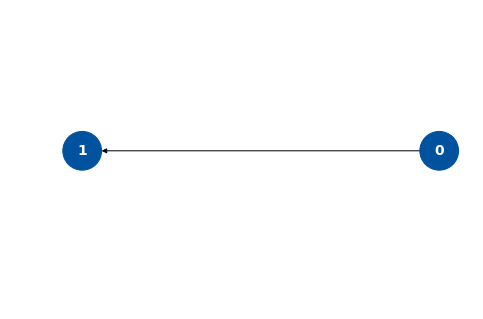

scale:,None
max_iter:,100
tol:,0.0001
callbacks:,"['deviance', 'diffs']"
verbose:,False
terms:,s(0)
fit_intercept:,True


copy:,True
with_mean:,True
with_std:,True


In [2]:
obs = whypy.load.observations(modelclass=2, no_obs=500, seed=1)
regmod = whypy.load.model_lingam(term='spline')
scaler = whypy.load.scaler_standard()

### 2. Initialize a bivariate steadystate ANM-Model:

In [3]:
mymodel = whypy.steadystate.bivariate.Model(obs=obs, combinations='all', regmod=regmod, scaler=scaler)

### 3. Run Causal Inference

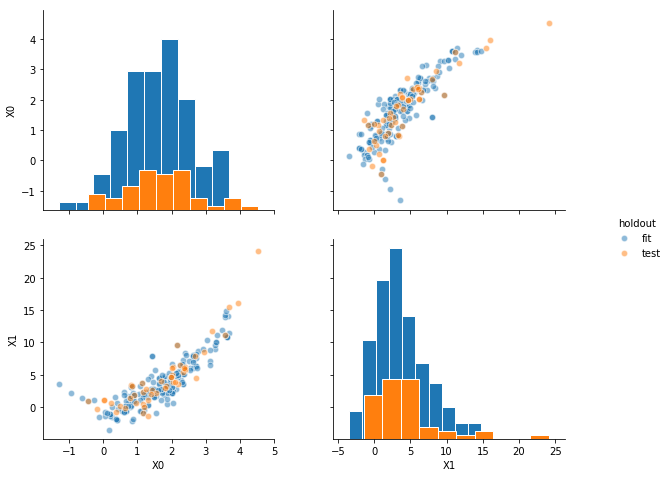

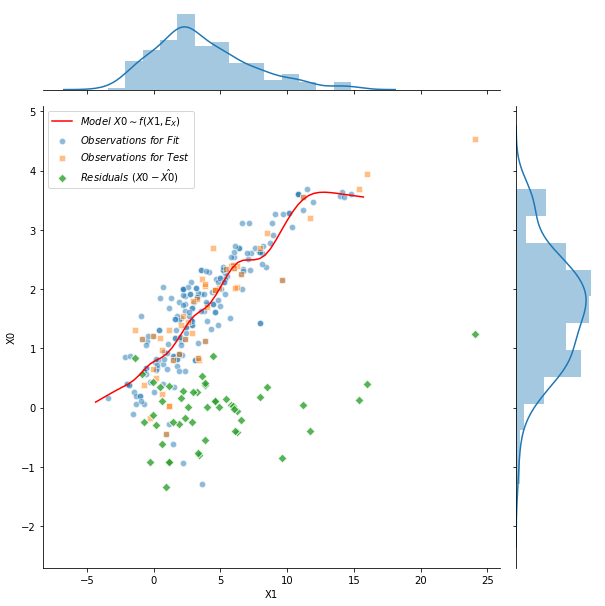

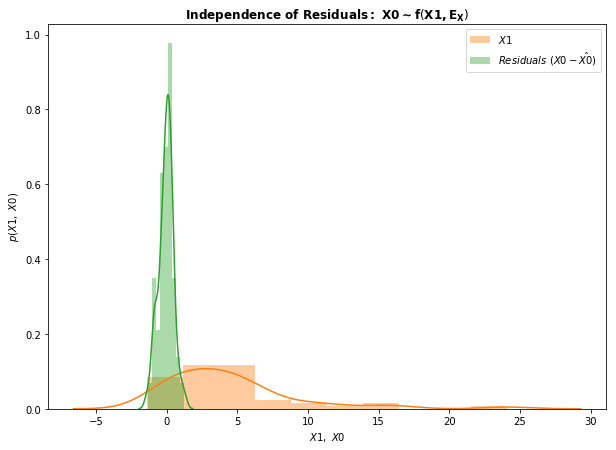

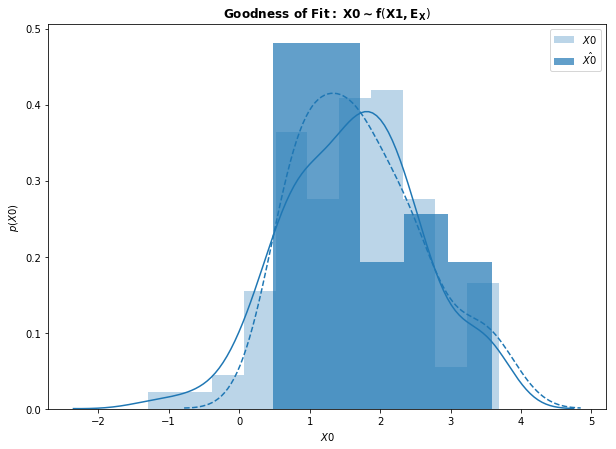

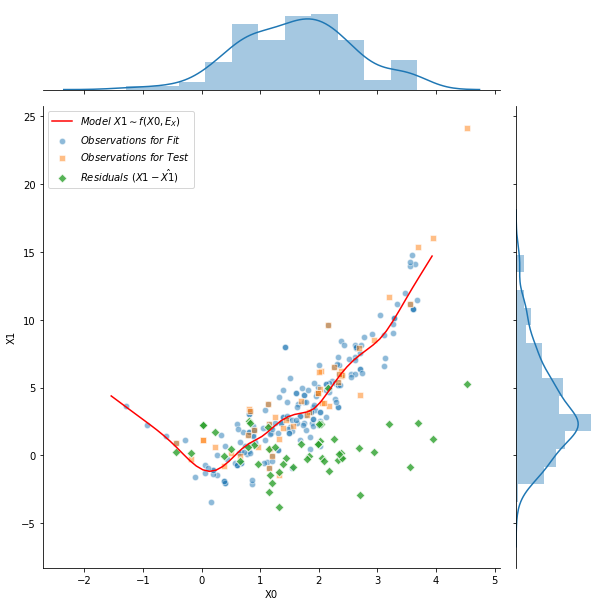

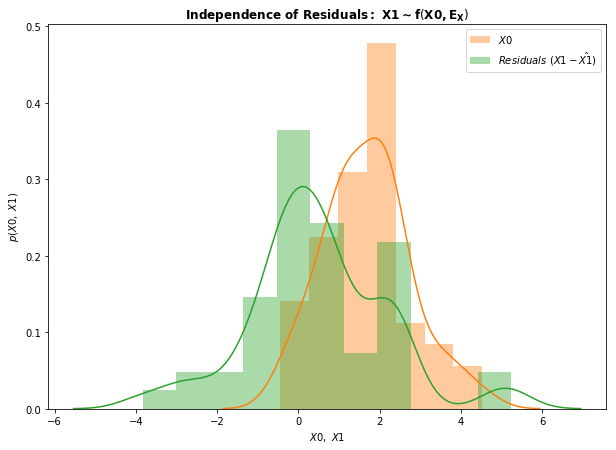

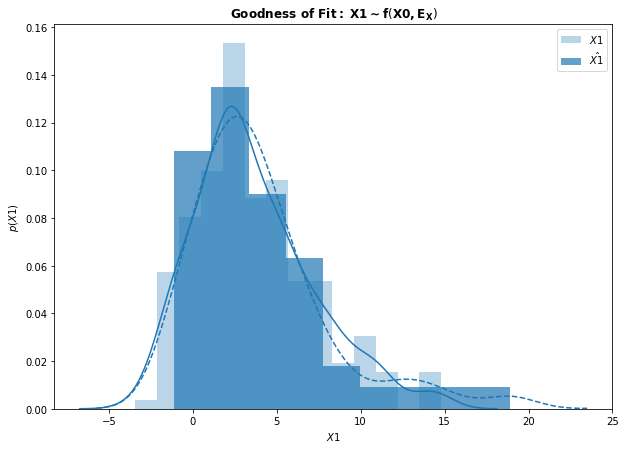

testtype:,LikelihoodVariance
scale:,True
bootstrap:,100
holdout:,True
shape_observations:,"(500, 2)"
shape_combinations:,"(2, 2)"
regression_model:,"LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, max_iter=100, scale=None, terms=s(0), tol=0.0001, verbose=False)"
scaler_model:,"StandardScaler(copy=True, with_mean=True, with_std=True)"
**kwargs:,"{'bootstrap_ratio': 0.5, 'bootstrap_seed': None, 'holdout_ratio': 0.2, 'holdout_seed': None, 'modelpts': 50, 'gridsearch': False}"


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$X0 \sim f(X1)$,2.670e-02,2.043e-01,5.553e-01,2.778e-01,1.051e-02,2.881e-01
1,$X1 \sim f(X0)$,5.553e-01,2.778e-01,2.670e-02,2.043e-01,4.910e-01,3.168e-01


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$X0 \sim f(X1)$,9.030e-03,2.238e-01,4.905e-01,2.701e-01,1.860e-02,2.649e-01
1,$X1 \sim f(X0)$,4.905e-01,2.701e-01,9.030e-03,2.238e-01,3.678e-01,3.086e-01


,Bivariate Comparison,Indep. Variable [Median],Indep. Variable [SD],Depen. Variable [Median],Depen. Variable [SD],Residuals [Median],Residuals [SD]
0,$X0 \sim f(X1)$,2.018e-03,2.450e-01,6.140e-01,3.108e-01,1.758e-03,3.149e-01
1,$X1 \sim f(X0)$,6.140e-01,3.108e-01,2.018e-03,2.450e-01,4.965e-01,3.619e-01


,Bivariate Comparison,Depen. Variable - Prediction [Median],Depen. Variable - Prediction [SD]
0,$X0 \sim f(X1)$,5.338e-01,3.535e-01
1,$X1 \sim f(X0)$,-4.682e+00,5.804e-01


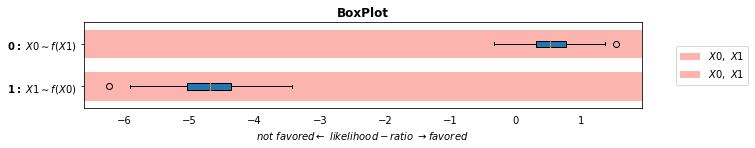

,Bivariate Comparison,Indep. Variable - Residuals [Median],Indep. Variable - Residuals [SD]
0,$X0 \sim f(X1)$,-1.011e+00,4.399e-01
1,$X1 \sim f(X0)$,-6.450e-01,3.184e-01


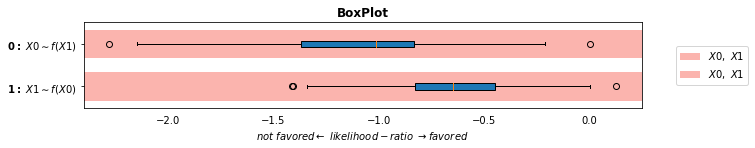

In [4]:
mymodel.run(testtype='LikelihoodVariance',
            scale=True,
            bootstrap=100,
            holdout=True,
            plot_inference=True,
            plot_results=True,
            bootstrap_ratio=0.5
            )

[[return to start]](#whypy)

<div style="background-color:RGB(0,81,158);color:RGB(255,255,255);padding:10px;">
<h1> <a name="model"></a> Causal Model</h1>
</div>

## <a name="model-init"></a> Init Instance

Import Whypy Toolbox

```python
import whypy
```

---

1. The data producing process is **steady state** + The model is **bivariate** (one independent variable)

```python
whypy.steadystate.bivariate.Model(obs, combinations, regmod, obs_name, scaler)
```

---

2. The data producing process is **steady state** + The model is **bivariate** (n independent variable)

```python
whypy.steadystate.mvariate.Model(obs, combinations, regmod, obs_name, scaler)
```

---

3. The data producing process is **transient** ($t_0$: offset, $s$: stride)+ The model is **multi variate** (one independent variable)

```python
whypy.transient.bivariate.Model(obs, combinations, regmod, obs_name, scaler, t0, stride)
```

---

4. The data producing process is **transient** ($t_0$: offset, $s$: stride)+ The model is **multi variate** (n independent variable)

```python
whypy.transient.mvariate.Model(obs, combs, regmod, obs_name, scaler, t0, stride)
```

---
---
---
[[return to start]](#whypy)

## <a name="model-parameters"></a>Instance-Parameters
To run causal inference a model instance must be initialized with the following attributes:

><a name="obs"></a>obs: 
* Type: Numpy Array of shape(m, n)
   * m: number of observations
   * n: number of variables
* Description: All variables to be tested in different combinations.
   
><a name="combs"></a>combs:
* Type: 'all' default or nested list
* Logic: First number is number of dependent variable, following numbers are numbers of independent variable:
   * Combination 1: [[dependent_variable_1, independent_variable_2, independent_variable_3, ...],
   * Combination 2:  [dependent_variable_2, independent_variable_1, independent_variable_3, ...],
   * Combination j:   ... ,
   * Combination k:  [...]]
* Description: Combinations of dependent and independent varialbes to be tested.
   
><a name="regmod"></a>regmod:
* Type: Model Object or List of Model Objects
   * Condition: Models must be callable with "fit" and "predict"
   * If list of models is given, list must have same length as number k of combinations
* Description: Models to regress independent and dependent variables.

><a name="obs_name"></a>obs_name (optional):
* Type: List with name strings of shape(n)
   * n: number of variables
* Description: Variable Naming, default is X1, X2, ... Xn
   
><a name="scaler"></a>scaler (optional): 
* Type: Model Object or List of Model Objects
   * Condition: Models must be callable with "fit", "transform" and "inverse_transform"
   * If list of models is given, list must have same length as number k of combinations
* Description: Models to scale observations before regression.
   
><a name="t0"></a>t0 (required in transient models):
* Type: Integer
* Description: Offset $Y[t_0::] \sim f(X[:-t_0:])$
   
><a name="stride"></a>stride (required in transient models):
* Type: Integer
* Description: $Y[::stride] \sim f(X[::stride])$


---
---
---
[[return to start]](#whypy)


## <a name="model-methods"></a>Instance-Methods

**<a name="run"></a>model.run():** Do Causal Inference

```python
model.run(testtype='LikelihoodVariance', scale=True, bootstrap=False, holdout=False, plot_inference=True, plot_results=True, **kwargs)
```
><a name="testtype"></a>testtype:
   * Type: 'LikelihoodVariance' (default), 'LikelihoodEntropy' (to be done), ['KolmogorovSmirnoff'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html), ['MannWhitney'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), 'HSIC' (to be done)
   * Description: Choose a test metric to be performed.

><a name="scale"></a>scale:
   * Type: True (default) or False
   * Description: If True scale observations before regression.
   
><a name="bootstrap"></a>bootstrap:
   * Type: True or False (default)
   * Description: Whether to bootstrap over the observations or not (see also bootstrap_ratio and bootstrap_seed)

><a name="holdout"></a>holdout:
   * Type: True or False (default)
   * Description: Whether to split observations between regression and test or not (see also holdout_ratio and holdout_seed)

><a name="plot_inference"></a> plot_inference:
   * Type: True (default) or False
   * Description: Plot various visualisations of the inference (Pairgrid of observations, 2D Regression, Histogramms)
   
><a name="plot_results"></a>plot_results:
   * Type: True (default) or False
   * Description: Plot DataFrames of Normality Tests, Goodness of Fit, Independence Test and BoxPlot of test results.

><a name="bootstrap_ratio"></a>bootstrap_ratio:
   * Type: Float, should be between 0.0 and 1.0 (default)
   * Description: Ratio of the original observations number m to be used for bootstraping.

><a name="bootstrap_seed"></a>bootstrap_seed:
   * Type: None (default) or int
   * Description: Seed the generator for bootstraping.
   
><a name="holdout_ratio"></a>holdout_ratio:
   * Type: Float, should be between 0.0 and 1.0 - 0.2 (default)
   * Description: Ratio of the original observations number m to be used to holdout for test.

><a name="holdout_seed"></a>holdout_seed:
   * Type: None (default) or int type
   * Description: Seed the generator for holdout.

><a name="modelpts"></a>modelpts:
   * Type: integer - 50 (default)
   * Description: Number of points used to visualize the regression model.
   
><a name="gridsearch"></a>gridsearch:
   * Type: True or False (default)
   * Description: Wheter or not a gridsearch should be performed to find the regmods hyperparameters. If gridsearch is True and model is not pygam, a param_grid parameter must be passed.

><a name="param_grid"></a>param_grid:
   * Type: dict()
   * Description: Defines the hyperparameters to be tested in gridsearch. Must fit to the given regmod. Not needed if model is pygam.

---

**model.plot_inference():** Equal to Method "run" Parameter [plot_inference](#plot_inference)

```python
model.plot_inference()
```

---

**model.plot_results():** Equal to Method "run" Parameter [plot_results](#plot_results)

```python
model.plot_results()
```

---

**<a name="get_combs"></a>model.get_combs():** Returns the Nested List of Combinations used in [model.run()](#run)

```python
model.get_combs()
```

---

**<a name="get_regmod"></a>model.get_regmod():** Returns the List of Regression Models used in [model.run()](#run)

```python
model.get_regmod()
```

---

**<a name="get_scaler"></a>model.get_scaler():** Returns the List of Scalers used in [model.run()](#run)

```python
model.get_scaler()
```

---

**<a name="get_obs_name"></a>model.get_obs_name():** Returns the List of Observation Names assigned in [model.run()](#run)

```python
model.get_obs_name()
```

---
---
---
[[return to start]](#whypy)


## <a name="model-attributes"></a>Instance-Attributes

**model.results:** DataFrame containing all results.

```python
model.results
```
  
>model.results['Fitted Combination']:
   * Type: String
   * Description: One String listing all Observation Names tested in the given [Combination](#combinations)
   
>model.results['Bivariate Comparison']:
   * Type: String
   * Description: One String describing a Bivariate Case out of the above combination.

>model.results['tdep']:
   * Type: Int
   * Description: Dependent Variable in the Bivariate Case.

>model.results['tindeps']:
   * Type: List
   * Description: List of all independent Variables in the Combination.
   
>model.results['tindep']:
   * Type: Int
   * Description: Independent Variable in the Bivariate Case.
   
>model.results['Normality Indep. Variable SW_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: <a name="listmedsd-explanation"></a>[List] -> dumped json | [Median] -> mean of all results given in list (float)| [SD] -> standard deviation of all results given in list (float)
   * Description: Normality Test on Independent Variable based on [scipy.stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

>model.results['Normality Indep. Variable Pearson_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Independent Variable based on [scipy.stats.normaltest()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
   
>model.results['Normality Indep. Variable Combined_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Independent Variable based on [scipy.stats.combine_pvalues()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html)

>model.results['Normality Depen. Variable SW_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Dependent Variable based on [scipy.stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
   
>model.results['Normality Depen. Variable Pearson_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Dependent Variable based on [scipy.stats.normaltest()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
   
>model.results['Normality Depen. Variable Combined_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Dependent Variable based on [scipy.stats.combine_pvalues()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html)
   
>model.results['Normality Residuals SW_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Residuals Variable based on [scipy.stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
   
>model.results['Normality Residuals Pearson_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Residuals Variable based on [scipy.stats.normaltest()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
   
>model.results['Normality Residuals Combined_pvalue [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Normality Test on Residuals Variable based on [scipy.stats.combine_pvalues()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html)
   
>model.results['Dependence: Indep. Variable - Residuals LikelihoodVariance [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Test dependence between Independent Variable and Residuals based on selected [testype](#testtype)

>model.results['Dependence: Depen. Variable - Prediction (GoF) LikelihoodVariance [List]'], ['... [Median]'], ['... [SD]']:
   * Type: [see above](#listmedsd-explanation)
   * Description: Test dependence between Dependent Variable and predicted Dependent Variable (Goodness of Fit) based on selected [testype](#testtype)

---

**model.obs:** [see above](#obs)
```python
model.obs
```

--- 

**model.combs:** [see above](#combs), if 'all' is passed see also [model.get_combs()](#get_combs)

```python
model.combs
```

---

**model.regmod:** [see above](#regmod), if single Object is passed see also [model.get_regmod()](#get_regmod)
```python
model.regmod
```

---

**model.obs_name (optional):** [see above](#obs_name), if None is passed see also [model.get_obs_name()](#get_obs_name)
```python
model.obs_name
```

---

**model.scaler (optional):** [see above](#scaler), if single Object is passed see also [model.get_scaler()](#get_scaler)
```python
model.scaler
```

---

**model.t0 (required in transient models):** [see above](#t0)
```python
model.t0
```

---
   
**model.stride (required in transient models):** [see above](#stride)
```python
model.stride
```

[[return to start]](#whypy)


<div style="background-color:RGB(0,81,158);color:RGB(255,255,255);padding:10px;">
<h1> <a name="template"></a>Templates </h1>
<div>

There are various Regression Models, Scalers and Observational datasets available to be loaded:

## <a name="template-observations"></a>Observations

**whypy.load.observations():** Load Observational Datasets

```python
whypy.load.observations(modelclass, no_obs=100, seed=None)
```
  
>modelclass:
   * Type: Integer, should be between 1 and 10
   * Description: Each modelclass is defined by No. of Variables, Class of Functions and Class of Noise Distribution. Load Observations to get short summary of description.
   
>no_obs:
   * Type: Integer > 0 - 100 (default)
   * Description: Number of observations m assigned to each variable.

>seed:
   * Type: None (default) or int
   * Description: Seed the generator for Noise Distribution.

<u> Returns:</u>

Displays a short summary of the loaded dataset and the underlying causal graph.

>obs:
   * Type: Numpy Array of shape(m, n)
   * Description: [see above](#obs)

---
---
---
[[return to start]](#whypy)

## <a name="template-regressionmodel"></a>Regression Model

**whypy.load.model_lingam():** Load a [Linear GAM](https://pygam.readthedocs.io/en/latest/api/lineargam.html) Regression Model.

```python
whypy.load.model_lingam(term='spline')
```
  
>term:
   * Type: 'linear', 'spline' (default) or 'factor'
   * Description: [see PyGAM Documentation](https://pygam.readthedocs.io/en/latest/api/lineargam.html)

<u> Returns:</u>

Displays a short summary of the loaded regression model.

>regmod:
   * Type: Single Instance of Regression Model
   * Description: [see above](#regmod)

---

**whypy.load.model_svr():** Load a [Support Vector Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) Model. 

```python
whypy.load.observations(term='poly4')
```
  
>modelclass:
   * Type: 'linear', 'poly2' or 'poly4' (default)
   * Description: [see sklearn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

<u> Returns:</u>

Displays a short summary of the loaded regression model.

>regmod:
   * Type: Single Instance of Regression Model
   * Description: [see above](#regmod)

---

**whypy.load.model_polynomial_lr():** Load a Linear Regression Model based on Polynomial Features.

```python
whypy.load.model_polynomial_lr(degree=2)
```
  
>degree:
   * Type: Integer > 0, Degree of polynomial feature space
   * Description: Model is a Pipeline containing a [Function Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) mapping observations to polynomial feature space of given degree (without interactions) and a [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) Regression Model. 

<u> Returns:</u>

Displays a short summary of the loaded regression model.

>regmod:
   * Type: Single Instance of Regression Model
   * Description: [see above](#regmod)

---
---
---
[[return to start]](#whypy)

## <a name="template-scaler"></a>Scaler

**whypy.load.scaler_minmax():** Load a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) Model, scaling to feature_range=(0, 1).

```python
whypy.load.scaler_minmax()
```

<u> Returns:</u>

Displays a short summary of the loaded scaler model.

>scaler:
   * Type: Single Instance of Scaler Model
   * Description: [see above](#scaler)

---

**whypy.load.scaler_standard():** Load a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) Model.

```python
whypy.load.scaler_standard()
```
  
<u> Returns:</u>

Displays a short summary of the loaded scaler model.

>scaler:
   * Type: Single Instance of Scaler Model
   * Description: [see above](#scaler)

[[return to start]](#whypy)